Handwritten digits classification using neural network

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

Import libraries

In [98]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Loading the dataset

In [99]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

Look the lenth of the training data set

In [100]:
len(X_train)

60000

Look the lenth of the testing data set

In [101]:
len(X_test)

10000

Take the shape of the 1st x element in the training data set

In [102]:
X_train[0].shape

(28, 28)

Look array values of the 1st x element trainin data set

In [103]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Visualize the first x element of the traing data set

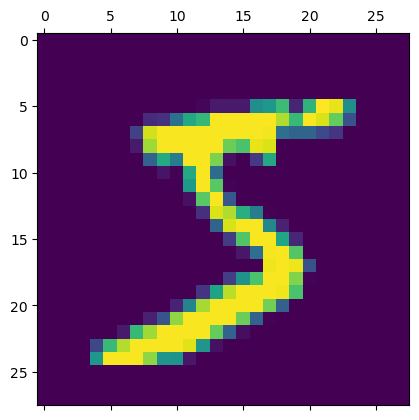

In [104]:
plt.matshow(X_train[0])

Check the first y element of the training data set

In [105]:
y_train[0]

5

Scaling the x values of the trainin and testing dataset

In [106]:
X_train = X_train / 255
X_test = X_test / 255

First x training value after scaling

Flatten the x values of the trainig and testing data set

In [107]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

Shape of the flatten x training data

In [108]:
X_train_flattened.shape

(60000, 784)

1st x element of the flatten x training data

In [109]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Simple neaural network with no hidden layers

In [110]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape =(784,), activation='sigmoid') # here we use 10 neurons as we need to output 10 numbers
])

#compiling passing arguments
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  
)

model.fit(X_train_flattened, y_train, epochs=5)

/orange/alberto.perezant/imesh.ranaweera/.conda/envs/ml/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8093 - loss: 0.7316
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9151 - loss: 0.3073
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9190 - loss: 0.2885
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9224 - loss: 0.2761
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9264 - loss: 0.2627


Evaluate the accuracy on test data set

In [111]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.9124 - loss: 0.3090


[0.27218374609947205, 0.9235000014305115]

predict the values for X_test_flatten and print the first predicted y value

In [112]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0] # will ive you ten outputs from ten neurons

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step


array([2.9237166e-02, 4.5801866e-07, 7.2839782e-02, 9.4186771e-01,
       3.6272651e-03, 1.1836348e-01, 8.8220656e-07, 9.9973243e-01,
       8.7390043e-02, 6.5593016e-01], dtype=float32)

View the first x element of the test data

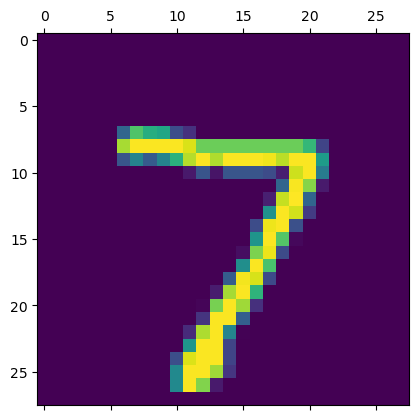

In [113]:
plt.matshow(X_test[0])

The the largest value of the output and find the predicted numer
np.argmax finds a maximum element from an array and returns the index of it

In [114]:
np.argmax(y_predicted[0])

7

printing first 5 predictions

In [115]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Build the confusion metrix

In [116]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1117,    4,    2,    0,    1,    3,    2,    6,    0],
       [   9,    8,  929,   16,   16,    4,    6,    8,   32,    4],
       [   4,    0,   20,  920,    3,   26,    1,    9,   18,    9],
       [   2,    1,    5,    1,  938,    0,    4,    3,    4,   24],
       [  11,    3,    7,   23,   14,  792,    8,    4,   24,    6],
       [  15,    3,   13,    1,   16,   20,  886,    2,    2,    0],
       [   1,    6,   25,    7,   11,    1,    0,  937,    2,   38],
       [  12,   10,    6,   22,   13,   39,    8,    9,  843,   12],
       [  11,    7,    1,    9,   46,    8,    0,   16,    4,  907]],
      dtype=int32)>

Visualize the confusion metrix

Text(95.72222222222221, 0.5, 'Truth')

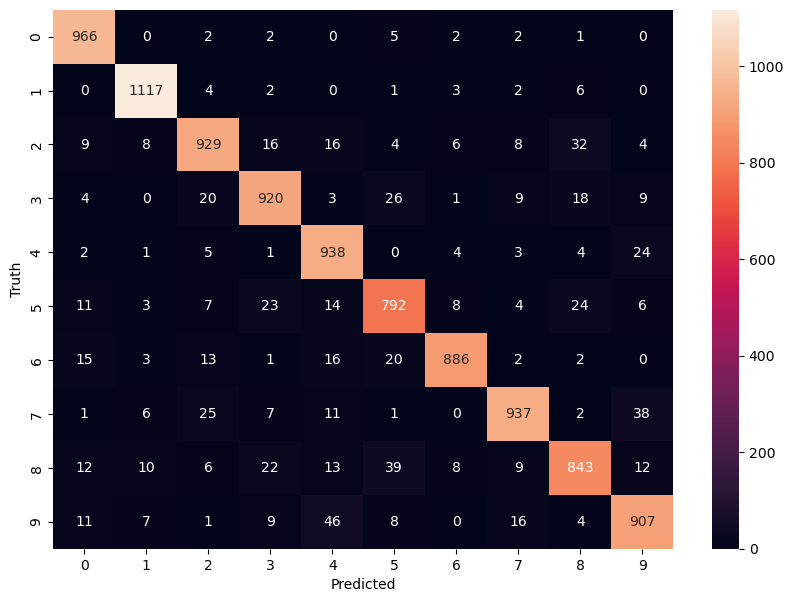

In [117]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using hidden layer to improve the performance

In [118]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

/orange/alberto.perezant/imesh.ranaweera/.conda/envs/ml/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8722 - loss: 0.4550
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9601 - loss: 0.1385
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9733 - loss: 0.0890
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9810 - loss: 0.0638
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9855 - loss: 0.0487


evaluating the new model

In [119]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9699 - loss: 0.0939  


[0.0811099037528038, 0.9740999937057495]

Draw the new confusion matix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step


Text(95.72222222222221, 0.5, 'Truth')

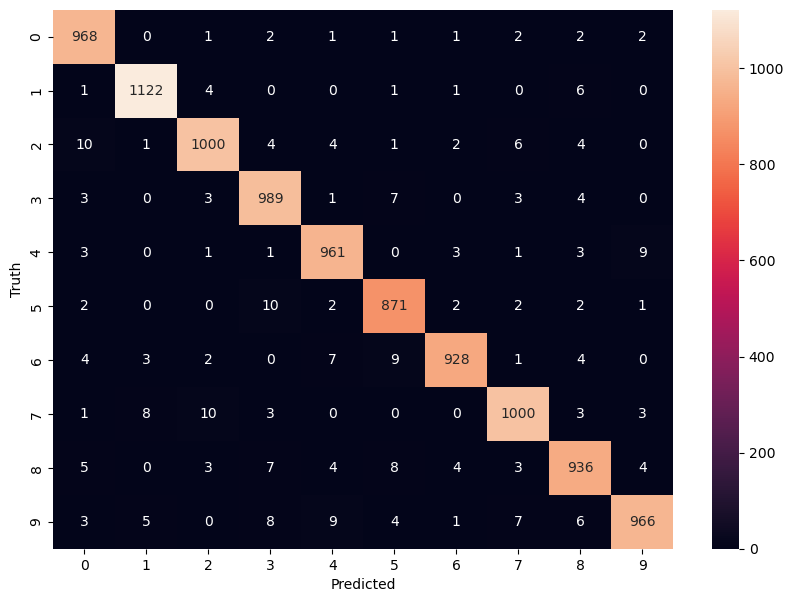

In [120]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8721 - loss: 0.4595
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9602 - loss: 0.1350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9746 - loss: 0.0885
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9798 - loss: 0.0651
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9853 - loss: 0.0514


Evaluate new model

In [138]:
 %reload_ext tensorboard
%tensorboard --logdir logs/fit 

Reusing TensorBoard on port 6006 (pid 771471), started 0:12:06 ago. (Use '!kill 771471' to kill it.)